# Dimensionality of Images

We can decompose a given image into the three color channels red, green and blue. Each channel can be represented as a (m × n)‑matrix with values ranging from 0 to 255. We will now compress the matrix A representing one of the channels.

To do this, we compute an approximation to the matrix A that takes only a fraction of the space to store. Now here's the great thing about SVD: the data in the matrices U, Σ and V is sorted by how much it contributes to the matrix A in the product. That enables us to get quite a good approximation by simply using only the most important parts of the matrices.

We now choose a number k of singular values that we are going to use for the approximation. The higher this number, the better the quality of the approximation gets but also the more data is needed to encode it. We now take only the first k columns of U and V and the upper left (k × k)-square of Σ, containing the k largest (and therefore most important) singular values. We then have:

<img src="images/svd-topk.png" width="500px"/>

The amount of data needed to store this approximation is proportional to the colored area:

compressed size = $m × k + k + k × n = k × (1 + m + n)$

In this notebook, we will choose a number of singular values k and see how this choice affects the quality of the approximation and the compression rate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from IPython.display import display,Math
from PIL import Image

In [2]:
bird = Image.open('images/bird.jpeg')

In [4]:
print(np.shape(bird))

(400, 600, 3)


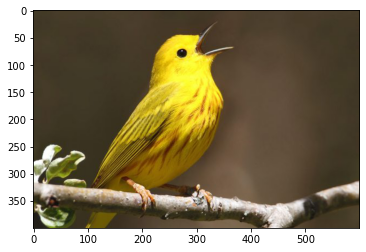

In [5]:
plt.imshow(bird)
plt.show()

To illustrate SVD on the 400x600x3 image, let's collapose the 3 color planes into 1 average value (at index '2'):

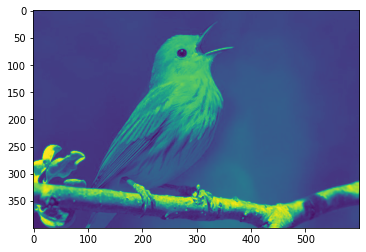

In [6]:
bird = np.mean(bird, 2)
plt.imshow(bird)
plt.show()

In [7]:
bird.shape

(400, 600)

In [8]:
U,s,V = np.linalg.svd(bird)

print(np.shape(U))
print(np.shape(s))
print(np.shape(V))

(400, 400)
(400,)
(600, 600)


Text(0.5, 1.0, 'V')

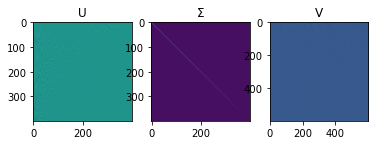

In [10]:
fig, ax = plt.subplots(1,3)

ax[0].imshow(U)
ax[0].set_title('U')

ax[1].imshow(np.diag(np.log(s)))
ax[1].set_title('$\\Sigma$')

ax[2].imshow(V)
ax[2].set_title('V')

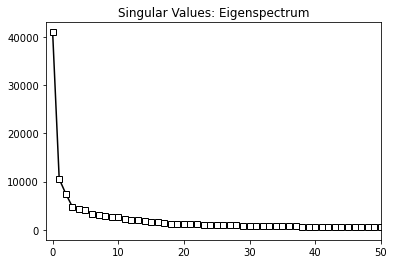

In [12]:
plt.plot(s, 'ks-', markerfacecolor='w')
plt.xlim([-1,50])
plt.title('Singular Values: Eigenspectrum')
plt.show()

For the majority of photographs, just like this example, the drop-off graph showing the singular values looks like a hyperbola: there are only a few really large SVs and a long tail of relatively smaller SVs. In contrast, for the random noise image the graph of SVs looks roughly linear.

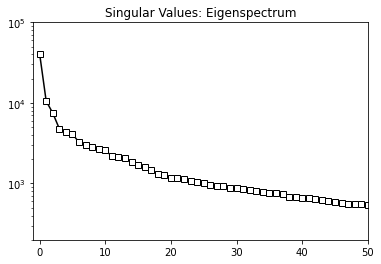

In [38]:
plt.plot(s, 'ks-', markerfacecolor='w')
plt.xlim([-1,50])
plt.ylim([20e1,10e4])
plt.yscale('log')
plt.title('Singular Values: Eigenspectrum')
plt.show()

## Reconstructing original image from SVD decompositions

In [13]:
S = np.zeros(np.shape(bird))
for i in range(0, len(s)):
    S[i, i] = s[i]
    
print(np.shape(S))
print(np.shape(U))

(400, 600)
(400, 400)


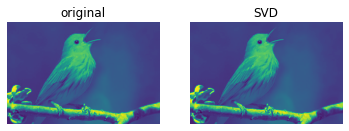

In [15]:
rbird =  U@S@V
plt.subplot(1,2,1)
plt.imshow(rbird)
plt.axis('off')
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(rbird)
plt.axis('off')
plt.title('SVD')

plt.show()

## Reconstructing with limited Singular Values

Let's first create a function that selects the first k number of singular values:

In [23]:
def reconstruct_top_k(M,k):
    U,s,V = np.linalg.svd(M)
    S = np.zeros(np.shape(M))
    for i in range(0, k):
        S[i, i] = s[i]

    return U@S@V

def display_orig_recon(orig, recon):
    plt.subplot(1,2,1)
    plt.imshow(orig)
    plt.axis('off')
    plt.title('original')

    plt.subplot(1,2,2)
    plt.imshow(recon)
    plt.axis('off')
    plt.title('SVD')

    plt.show()

In [19]:
print(np.shape(bird))

(400, 600)


In [18]:
np.linalg.matrix_rank(bird)

400

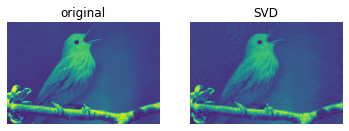

In [41]:
rbird = reconstruct_top_k(bird,30)
display_orig_recon(bird, rbird)

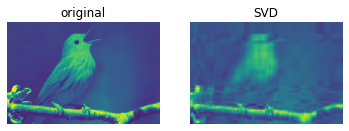

In [25]:
rbird = reconstruct_top_k(bird,10)
display_orig_recon(bird, rbird)

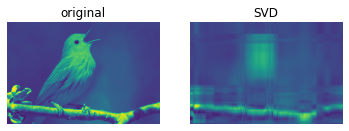

In [26]:
rbird = reconstruct_top_k(bird,5)
display_orig_recon(bird, rbird)

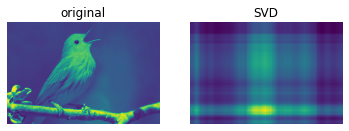

In [27]:
rbird = reconstruct_top_k(bird,1)
display_orig_recon(bird, rbird)

SVD is routinely used in statistics for principal component analysis and in numerical simulations for reducing the order of models. For image compression, more sophisticated methods like JPG that take human perception into account generally outperform compression using SVD.